In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import numpy as np

In [2]:
#Import crime data
filepath = r'Resources\UCR76_17.csv'
crime_df = pd.read_csv(filepath)
crime_df.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


In [3]:
#Import income data (2017)
filepath1 = r'Resources\kaggle_income2.xlsx'
income_df = pd.read_excel(filepath1)
#view income data
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [4]:
#filter crime data for year 2017 to match the income data
crime_df = crime_df.loc[crime_df['YEAR']==2017]

In [5]:
#Split of the state abbreviation from each of the counties on the crime dataframe
crime_df['County1'] = crime_df['County'].str.split(',').str[0]

In [6]:
# Add county to the end of each county entry in the crime dataframe to match the format of the income dataframe
crime_df['County'] = crime_df['County1'] + " " + 'County'

In [7]:
#Pivot on County and sum the murders to get the total amount of murders for the whole county
crime_df2 = crime_df.groupby(['County','State']).sum()['MRD']
crime_df2

County              State         
Abbeville County    South Carolina     1
Acadia County       Louisiana          7
Accomack County     Virginia           3
Ada County          Idaho              3
Adair County        Kentucky           2
                    Missouri           1
                    Oklahoma           1
Adams County        Colorado          21
                    Nebraska           1
                    Ohio               2
                    Pennsylvania       1
                    Washington         1
Addison County      Vermont            1
Aiken County        South Carolina    12
Alachua County      Florida            9
Alamance County     North Carolina     4
Alameda County      California        90
Albany County       New York           8
                    Wyoming            1
Albemarle County    Virginia           5
Alexander County    North Carolina     1
Alexandria County   Virginia           6
Alfalfa County      Oklahoma           1
Alger County        Mi

In [8]:
income_df = income_df.rename(columns={'State_Name': 'State'})

In [9]:
income_df2 = income_df.groupby(['County','State']).mean()['Mean']

In [10]:
print(len(income_df2))
print(len(crime_df2))

1678
1533


In [42]:
combined_df2 = pd.merge(crime_df2, income_df2, left_index=True, right_index=True)
combined_df2 = combined_df2.reset_index()
combined_df2

,County,State,MRD,Mean
0,Abbeville County,South Carolina,1,56507.667464
1,Accomack County,Virginia,3,79689.473973
2,Ada County,Idaho,3,57745.826772
3,Adair County,Kentucky,2,55499.625000
4,Adair County,Missouri,1,58124.035533
5,Adair County,Oklahoma,1,56677.839109
6,Adams County,Colorado,21,73878.751046
7,Adams County,Nebraska,1,63907.714286
8,Adams County,Ohio,2,59663.274590
9,Adams County,Pennsylvania,1,65437.888376


In [16]:
combined_df = combined_df2.reset_index()
len(combined_df)

878

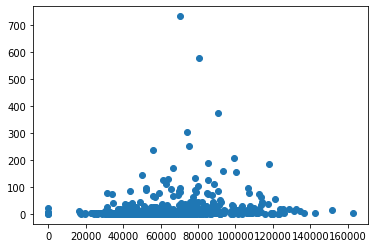

In [13]:
plt.scatter(combined_df['Mean'], combined_df['MRD'])

In [21]:
population_by_county = pd.read_excel(r'Resources\population_by_county.xlsx')
population_by_county = population_by_county.rename(columns={'Geography':'State', 'Geography.2':'County'})

In [22]:
population_by_county.head()

,Id,Id2,State,Target Geo Id,Target Geo Id2,Geography.1,County,"Population Estimate - April 1, 2010 Estimates Base","Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010 Estimates Base","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,4780135,4874747,94612,2.0,(X),(X),(X),(X)
1,0400000US01,1,Alabama,0500000US01001,1001,Alabama - Autauga County,Autauga County,54571,55504,933,1.7,23,24,14,15
2,0400000US01,1,Alabama,0500000US01003,1003,Alabama - Baldwin County,Baldwin County,182265,212628,30363,16.7,7,6,1,1
3,0400000US01,1,Alabama,0500000US01005,1005,Alabama - Barbour County,Barbour County,27457,25270,-2187,-8.0,39,41,61,61
4,0400000US01,1,Alabama,0500000US01007,1007,Alabama - Bibb County,Bibb County,22919,22668,-251,-1.1,45,45,30,31


In [26]:
population_by_county.columns

Index(['Id', 'Id2', 'State', 'Target Geo Id', 'Target Geo Id2', 'Geography.1',
       'County', 'Population Estimate - April 1, 2010 Estimates Base',
       'Population Estimate - July 1, 2017', 'Change, 2010 to 2017 - Number',
       'Change, 2010 to 2017 - Percent [1]',
       'Rankings - Population Estimate - April 1, 2010 Estimates Base',
       'Rankings - Population Estimate - July 1, 2017',
       'Rankings - Change, 2010 to 2017 - Number',
       'Rankings - Change, 2010 to 2017 - Percent'],
      dtype='object')

In [30]:
population_by_county = population_by_county.rename(columns = {'Population Estimate - April 1, 2010 Estimates Base':'Population'})

In [31]:
population_by_county.head()

,Id,Id2,State,Target Geo Id,Target Geo Id2,Geography.1,County,Population,"Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010 Estimates Base","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,4780135,4874747,94612,2.0,(X),(X),(X),(X)
1,0400000US01,1,Alabama,0500000US01001,1001,Alabama - Autauga County,Autauga County,54571,55504,933,1.7,23,24,14,15
2,0400000US01,1,Alabama,0500000US01003,1003,Alabama - Baldwin County,Baldwin County,182265,212628,30363,16.7,7,6,1,1
3,0400000US01,1,Alabama,0500000US01005,1005,Alabama - Barbour County,Barbour County,27457,25270,-2187,-8.0,39,41,61,61
4,0400000US01,1,Alabama,0500000US01007,1007,Alabama - Bibb County,Bibb County,22919,22668,-251,-1.1,45,45,30,31


In [44]:
new_population_df = population_by_county.groupby(['County','State']).sum()[['Population','Id2']]
new_population_df = new_population_df.reset_index()
new_population_df.head()

,County,State,Population,Id2
0,Abbeville County,South Carolina,25416,45
1,Acadia Parish,Louisiana,61770,22
2,Accomack County,Virginia,33164,51
3,Ada County,Idaho,392377,16
4,Adair County,Iowa,7682,19


In [50]:
combined_df3 = pd.merge(combined_df2, new_population_df, left_on = ['County','State'], right_on = ['County','State'])
combined_df3 = combined_df3[['County', 'State', 'MRD', 'Mean', 'Population']]
combined_df3 = combined_df3.rename(columns={'Mean':'Average Household Income', 'Population':'Population (Estimate)'})

In [55]:
combined_df3['Per Capita Murder Rate'] = (combined_df3['MRD']/ combined_df3['Population (Estimate)'])*1000
combined_df3

,County,State,MRD,Average Household Income,Population (Estimate),Per Capita Murder Rate
0,Abbeville County,South Carolina,1,56507.667464,25416,0.039345
1,Accomack County,Virginia,3,79689.473973,33164,0.090460
2,Ada County,Idaho,3,57745.826772,392377,0.007646
3,Adair County,Kentucky,2,55499.625000,18655,0.107210
4,Adair County,Missouri,1,58124.035533,25607,0.039052
5,Adair County,Oklahoma,1,56677.839109,22683,0.044086
6,Adams County,Colorado,21,73878.751046,441702,0.047543
7,Adams County,Nebraska,1,63907.714286,31367,0.031881
8,Adams County,Ohio,2,59663.274590,28552,0.070048
9,Adams County,Pennsylvania,1,65437.888376,101417,0.009860


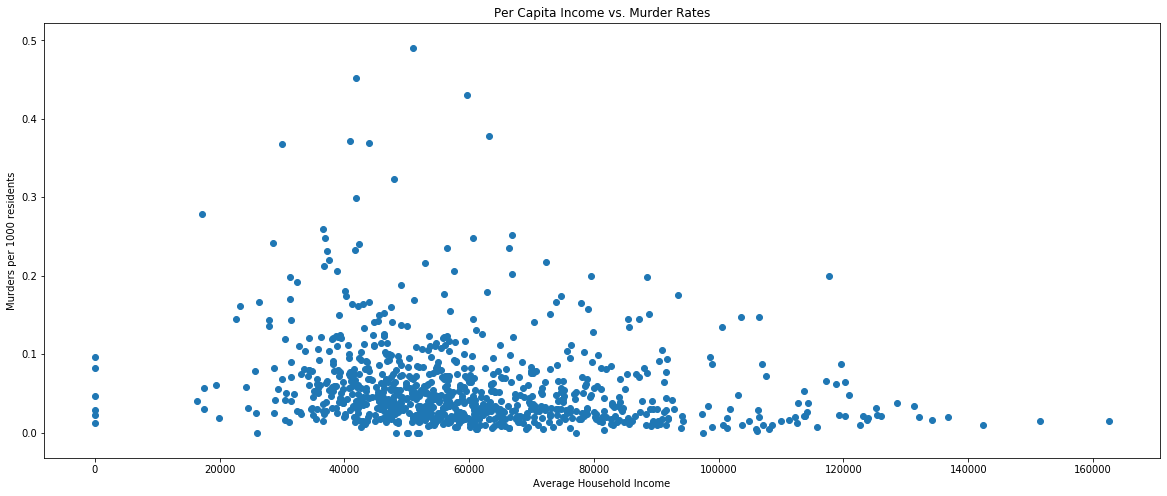

In [71]:
plt.scatter(combined_df3['Average Household Income'], combined_df3['Per Capita Murder Rate'])
plt.ylabel('Murders per 1000 residents')
plt.xlabel('Average Household Income')
plt.title('Per Capita Income vs. Murder Rates')
plt.rcParams["figure.figsize"] = (20,8)

Text(0.5, 0, 'Population (Estimate)')

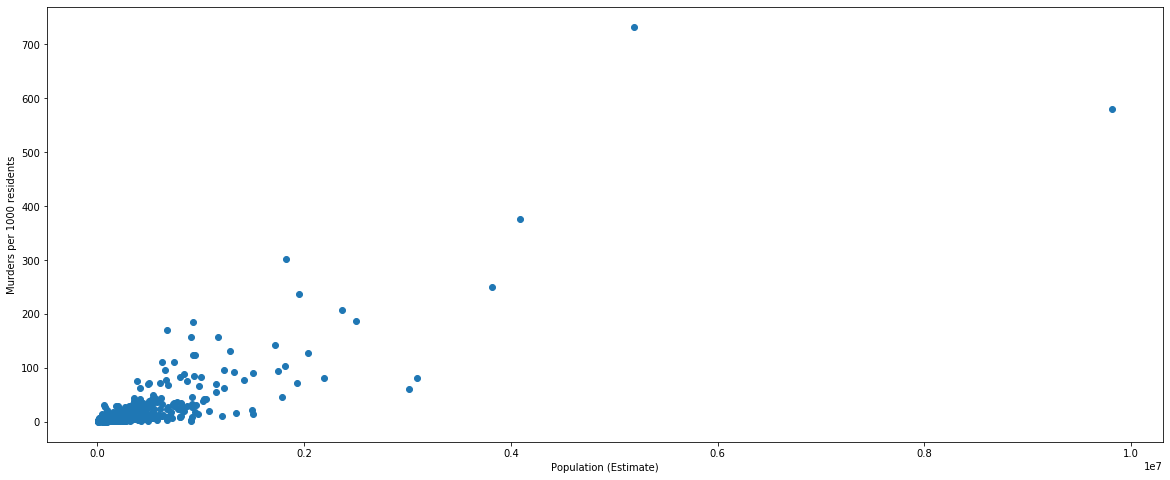

In [69]:
plt.scatter(combined_df3['Population (Estimate)'], combined_df3['MRD'])
plt.ylabel('Murders per 1000 residents')
plt.xlabel('Population (Estimate)')
plt.title()